# Exercise 11-1: Create a multiple regression

## Import the data

In [78]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
fish = pd.read_csv('Fish.csv')

In [80]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [81]:
# read the info.txt file and rename the Length columns so they're more descriptive
columns_to_rename = {
    "Length1":"VerticalLength",
    "Length2":"DiagonalLength",
    "Length3":"CrossLength"
}

fish = fish.rename(columns=columns_to_rename)
fish.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Identify a correlation

In [82]:
# get the correlation data for the Weight column
fish_corr = fish.corr()[['Weight']].sort_values(by='Weight', ascending=False)
fish_corr

,Weight
Weight,1.000000
CrossLength,0.923044
DiagonalLength,0.918618
VerticalLength,0.915712
Width,0.886507
Height,0.724345


<AxesSubplot:>

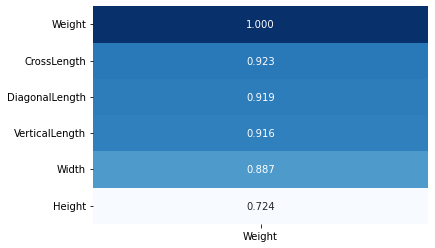

In [83]:
# create a heatmap for the correlation data
sns.heatmap(data=fish_corr, cmap='Blues', annot=True, cbar=False, fmt='.3f')

## Create a multiple regression model

In [84]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream

bream = fish.query('Species == "Bream"')
bream

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [85]:
# split the training and test data 
breamTrain, breamTest = train_test_split(bream)

In [86]:
# create the model and fit the training data
model = LinearRegression()
xCols = ['Height', 'Width', 'CrossLength']
model.fit(breamTrain[xCols], breamTrain['Weight'])

LinearRegression()

In [87]:
# score the testing data
model.score(breamTest[xCols], breamTest['Weight'])

0.979187307091261

In [88]:
# score the training data
model.score(breamTrain[xCols], breamTrain['Weight'])

0.9267584302407145

In [89]:
# make the predictions
y_predicted = model.predict(breamTest[xCols])
y_predicted

array([627.67281024, 317.94857666, 796.52429257, 389.2357557 ,
       904.33756995, 324.64698739, 651.429062  , 522.02765534,
       679.44143552])

In [94]:
# join the predicted data with the original data
predicted = pd.DataFrame(y_predicted, columns=['WeightPredicted'])

combined = predicted.join([breamTest[xCols].reset_index(drop=True), 
                           breamTest['Weight'].reset_index(drop=True)])
combined.head()

,WeightPredicted,Height,Width,CrossLength,Weight
0,627.672810,15.4380,5.5800,37.2,600.0
1,317.948577,12.4800,4.3056,31.2,290.0
2,796.524293,16.8896,6.1984,41.6,850.0
3,389.235756,12.6700,4.6900,35.0,390.0
4,904.337570,18.0369,6.3063,44.1,920.0


## Plot the residuals

In [91]:
# calculate the residuals and store them in a column

In [92]:
# create a KDE plot for the residuals